In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:

import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# https://www.youtube.com/watch?v=GRtgLlwxpc4 yolo

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/multi_image_data_4.npy',allow_pickle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(22920, 64, 64, 3)
(22920, 61)
(7641, 64, 64, 3)
(7641, 61)


In [ ]:
print(y_train[101])
print(X_train[101])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[[195 199 197]
  [161 167 161]
  [185 190 186]
  ...
  [170 175 168]
  [165 170 165]
  [224 225 224]]

 [[126 139 122]
  [ 95 108  93]
  [132 145 133]
  ...
  [151 163 149]
  [141 151 140]
  [174 177 175]]

 [[ 70  99  54]
  [ 42  64  35]
  [ 62  80  61]
  ...
  [155 166 152]
  [144 154 142]
  [159 161 159]]

 ...

 [[137 139 128]
  [107 110  92]
  [ 97  99  82]
  ...
  [111 108 102]
  [120 122 116]
  [162 163 161]]

 [[134 135 129]
  [ 83  84  74]
  [ 80  82  72]
  ...
  [115 118 111]
  [113 115 110]
  [160 161 159]]

 [[231 231 231]
  [180 180 180]
  [178 177 178]
  ...
  [177 177 178]
  [177 177 177]
  [218 218 218]]]


In [6]:
categories = ['간장게장', '갈비구이', '갈비찜', '갈비탕',
              '갈치구이', '감자채볶음', '감자탕', '계란국',
              '계란찜', '고등어구이', '고등어조림', '고추장진미채볶음',
              '곰탕_설렁탕', '곱창구이', '곱창전골', '김밥', '김치볶음밥',
              '김치찌개', '김치찜', '깍두기', '닭갈비', '닭계장', '닭볶음탕',
              '동태찌개', '된장찌개', '두부김치', '떡갈비', '떡국_만두국',
              '떡볶이', '라면', '막국수', '만두', '매운탕', '물냉면', '미역국',
              '배추김치', '보쌈', '북엇국', '불고기', '비빔냉면', '비빔밥',
              '삼겹살', '삼계탕', '소세지볶음', '수육', '수제비', '알밥',
              '애호박볶음', '양념치킨', '유부초밥', '육개장', '육회', '잡곡밥',
              '잡채', '제육볶음', '족발', '주먹밥', '짜장면', '짬뽕', '피자',
              '후라이드치킨']  # os.listdir(dir) 

#표준화
X_train = X_train.astype(float) / 255 #.astype(float)


In [7]:
X_test = X_test.astype(float) / 255

In [8]:
nb_classes = len(categories)

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100,validation_split=0.2)

Epoch 1/30
184/184 [==============================] - 14s 21ms/step - loss: 3.9395 - accuracy: 0.0412 - val_loss: 3.6063 - val_accuracy: 0.0971
Epoch 2/30
184/184 [==============================] - 3s 17ms/step - loss: 3.5317 - accuracy: 0.0975 - val_loss: 3.3419 - val_accuracy: 0.1462
Epoch 3/30
184/184 [==============================] - 3s 19ms/step - loss: 3.3173 - accuracy: 0.1333 - val_loss: 3.1169 - val_accuracy: 0.1885
Epoch 4/30
184/184 [==============================] - 4s 19ms/step - loss: 3.1546 - accuracy: 0.1687 - val_loss: 3.0506 - val_accuracy: 0.2092
Epoch 5/30
184/184 [==============================] - 3s 18ms/step - loss: 3.0319 - accuracy: 0.1940 - val_loss: 2.9115 - val_accuracy: 0.2321
Epoch 6/30
184/184 [==============================] - 3s 18ms/step - loss: 2.9069 - accuracy: 0.2209 - val_loss: 2.8471 - val_accuracy: 0.2546
Epoch 7/30
184/184 [==============================] - 4s 19ms/step - loss: 2.8012 - accuracy: 0.2384 - val_loss: 2.7768 - val_accuracy: 0.263

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

239/239 - 1s - loss: 3.0324 - accuracy: 0.2805 - 1s/epoch - 4ms/step


[3.0324225425720215, 0.2804606854915619]

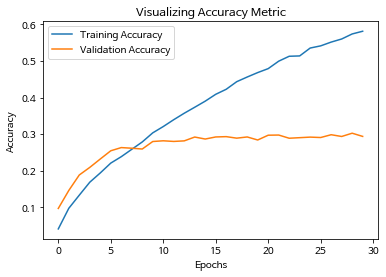

In [ ]:

plt.plot(range(0, 30) ,history.history['accuracy'], label='Training Accuracy')
plt.plot(range(0, 30) ,history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing Accuracy Metric')
plt.legend()
plt.show()

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/korean food_700"
image_w = 64
image_h = 64


Z = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    Z.append(data)

Z = np.array(Z)
prediction = model.predict(Z)



cnt = 0

pic = []
name = []

#파일들이 있으면 해당 파일과 비교
for i in prediction:
    pre_ans = i.argmax()  #predict후 가장 category에 가까운 인덱스로 변환  Ex: 0,0,0,0.24,0.76 -> 5

    for j , cate in enumerate(categories,0):
      if pre_ans == j: 
        pre_ans_str = cate

        print(filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
        cnt +=1
        if j==28 :
          pic.append(cnt)
          name.append(pre_ans_str)





12/12 [==============================] - 0s 3ms/step
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
rice-3997767__340.jpg이미지는 김치볶음밥로 추정됩니다.
spicy-seafood-3852529__340.jpg이미지는 갈비찜로 추정됩니다.
food-4452838__340.jpg이미지는 피자로 추정됩니다.
korean-food-709606__340.jpg이미지는 김치찜로 추정됩니다.
mandu-3852527__340.jpg이미지는 닭계장로 추정됩니다.
korean-food-4781973__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
kimchi-3852526__340.jpg이미지는 떡갈비로 추정됩니다.
pig-4901172__340.jpg이미지는 떡갈비로 추정됩니다.
octopus-desktop-4829030__340.jpg이미지는 매운탕로 추정됩니다.
food-4452839__340.jpg이미지는 닭볶음탕로 추정됩니다.
chicken-soup-1346310__340.jpg이미지는 삼계탕로 추정됩니다.
file-version-4829032__340.jpg이미지는 비빔밥로 추정됩니다.
delicious-5044522__340.jpg이미지는 소세지볶음로 추정됩니다.
korean-food-4781966__340.jpg이미지는 불고기로 추정됩니다.
korean-food-4781965__340.jpg이미지는 족발로 추정됩니다.
toppokki-1607479__340.jpg이미지는 라면로 추정됩니다.
market-1971125__340.jpg이미지는 주먹밥로 추정됩니다.
toppokki-2545943__340.jpg이미지는 배추김치로 추정됩니다.
kimbap-2610864__340

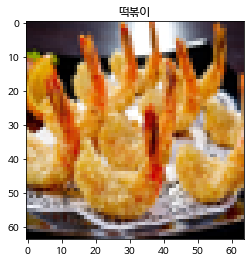

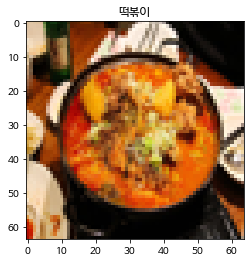

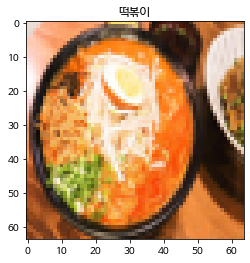

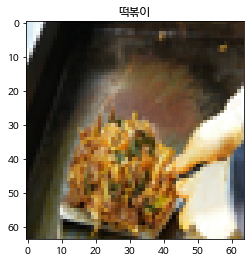

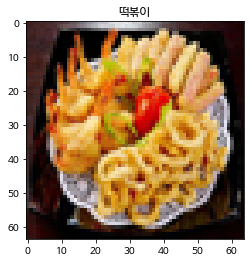

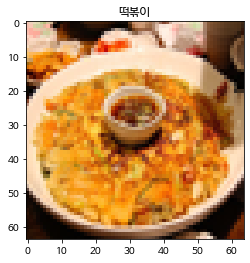

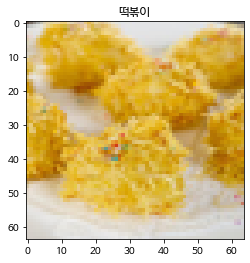

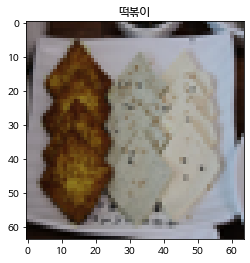

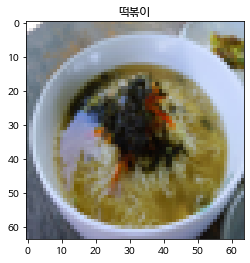

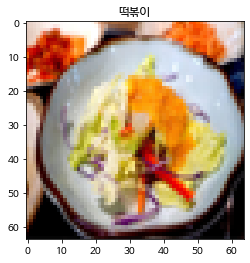

In [ ]:
for cnt in pic:
        fig, ax = plt.subplots()
        ax.imshow(Z[cnt])
        ax.set_title(name[0])

In [ ]:
# https://rubber-tree.tistory.com/120              
# mobilenet
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'), # 연산 효율이 높고 고성능을 필요로 하지 않아 사용 
                                                                            
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(61, activation='softmax')  
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

17225924/17225924 [==============================] - 3s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                262208    
                                                                 
 dense_3 (Dense)             (None, 61)                3965      
                                                                 
Total params: 3,495,037
Trainable params: 3,473,149
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100,validation_split=0.2)

Epoch 1/30
184/184 [==============================] - 14s 54ms/step - loss: 4.0501 - accuracy: 0.0473 - val_loss: 3.7571 - val_accuracy: 0.1008
Epoch 2/30
184/184 [==============================] - 8s 43ms/step - loss: 3.1919 - accuracy: 0.2008 - val_loss: 3.2278 - val_accuracy: 0.2105
Epoch 3/30
184/184 [==============================] - 8s 43ms/step - loss: 2.2981 - accuracy: 0.3972 - val_loss: 3.0132 - val_accuracy: 0.2744
Epoch 4/30
184/184 [==============================] - 8s 45ms/step - loss: 1.6020 - accuracy: 0.5699 - val_loss: 2.7757 - val_accuracy: 0.3209
Epoch 5/30
184/184 [==============================] - 8s 44ms/step - loss: 1.0807 - accuracy: 0.7094 - val_loss: 2.7616 - val_accuracy: 0.3455
Epoch 6/30
184/184 [==============================] - 8s 44ms/step - loss: 0.7042 - accuracy: 0.8225 - val_loss: 2.7767 - val_accuracy: 0.3453
Epoch 7/30
184/184 [==============================] - 9s 47ms/step - loss: 0.4528 - accuracy: 0.8997 - val_loss: 2.8206 - val_accuracy: 0.366

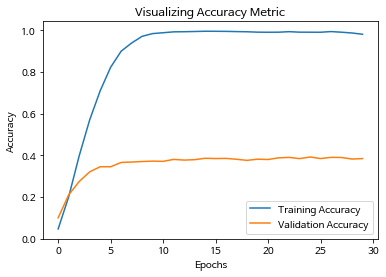

In [ ]:
plt.plot(range(0, 30) ,history.history['accuracy'], label='Training Accuracy')
plt.plot(range(0, 30) ,history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Visualizing Accuracy Metric')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test, verbose=2)

239/239 - 2s - loss: 3.8566 - accuracy: 0.3744 - 2s/epoch - 8ms/step


[3.8565964698791504, 0.3744274377822876]

In [ ]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/korean food_700"
image_w = 64
image_h = 64


Z = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    Z.append(data)

Z = np.array(Z)
prediction = model.predict(Z)



cnt = 0

pic = []
name = []

#파일들이 있으면 해당 파일과 비교
for i in prediction:
    pre_ans = i.argmax()  

    for j , cate in enumerate(categories,0):
      if pre_ans == j: 
        pre_ans_str = cate

        print("해당 "+filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
        cnt +=1
        if j==29 :
          pic.append(cnt)
          name.append(pre_ans_str)


12/12 [==============================] - 0s 8ms/step
해당 rice-3997767__340.jpg이미지는 라면로 추정됩니다.
해당 spicy-seafood-3852529__340.jpg이미지는 육회로 추정됩니다.
해당 food-4452838__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 korean-food-709606__340.jpg이미지는 수육로 추정됩니다.
해당 mandu-3852527__340.jpg이미지는 라면로 추정됩니다.
해당 korean-food-4781973__340.jpg이미지는 육회로 추정됩니다.
해당 kimchi-3852526__340.jpg이미지는 라면로 추정됩니다.
해당 pig-4901172__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 octopus-desktop-4829030__340.jpg이미지는 육회로 추정됩니다.
해당 food-4452839__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 chicken-soup-1346310__340.jpg이미지는 짜장면로 추정됩니다.
해당 file-version-4829032__340.jpg이미지는 육회로 추정됩니다.
해당 delicious-5044522__340.jpg이미지는 닭갈비로 추정됩니다.
해당 korean-food-4781966__340.jpg이미지는 떡갈비로 추정됩니다.
해당 korean-food-4781965__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 toppokki-1607479__340.jpg이미지는 라면로 추정됩니다.
해당 market-1971125__340.jpg이미지는 육회로 추정됩니다.
해당 toppokki-2545943__340.jpg이미지는 라면로 추정됩니다.
해당 kimbap-2610864__340.jpg이미지는 육회로 추정됩니다.
해당 tofu-597228__340.jpg이미지는 육회로 추정됩니다.
해당 kimchi-2449656__340.jpg이미지는 육회로 추정됩니

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


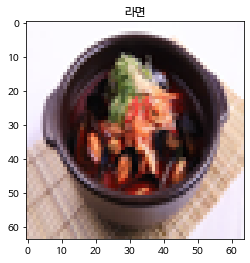

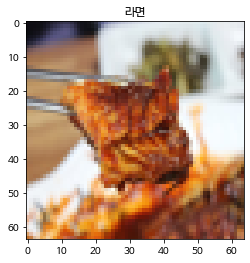

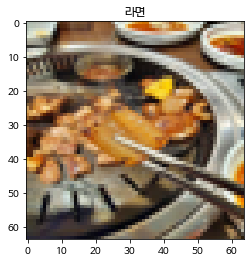

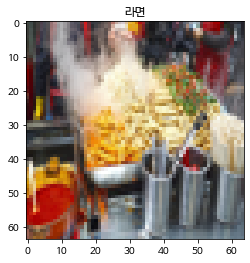

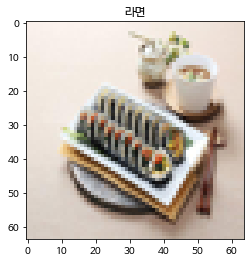

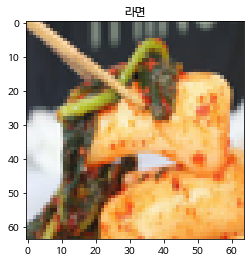

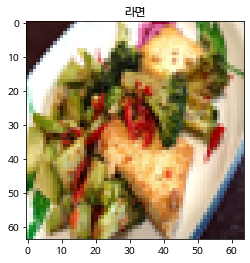

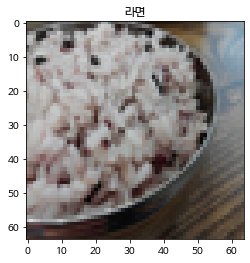

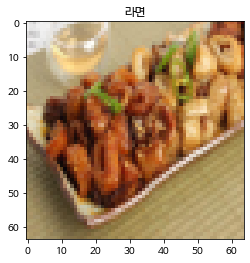

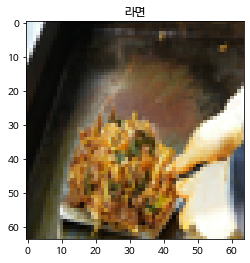

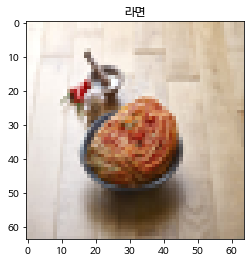

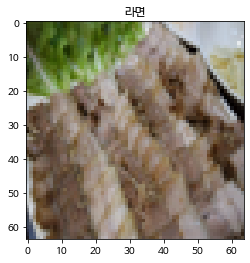

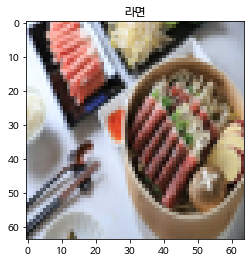

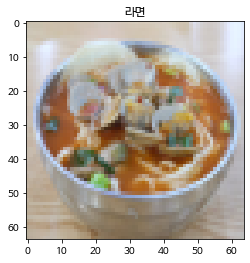

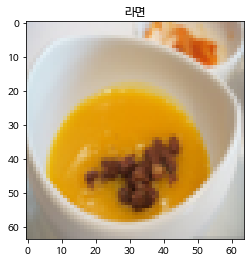

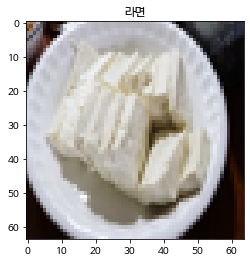

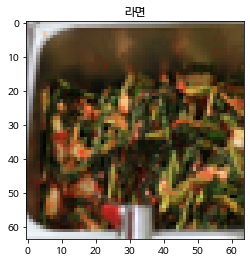

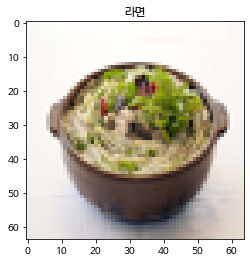

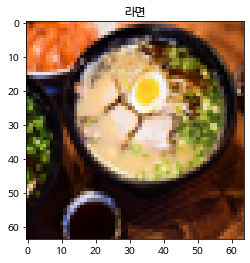

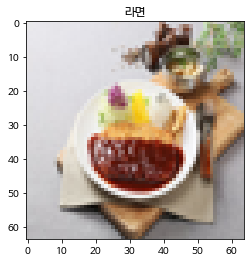

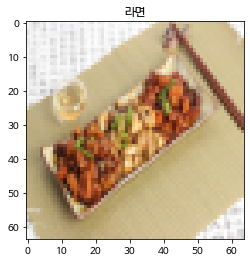

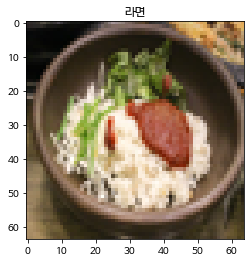

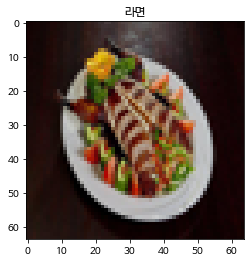

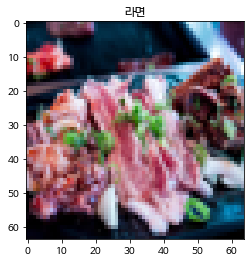

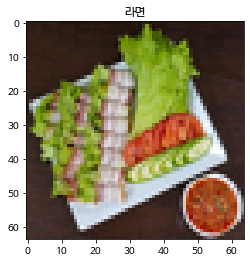

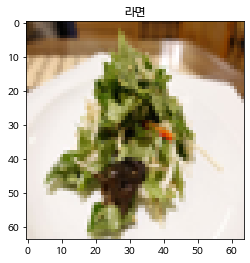

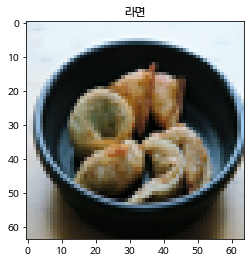

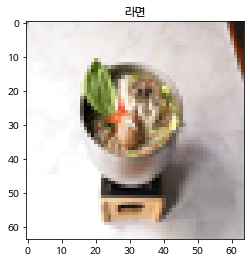

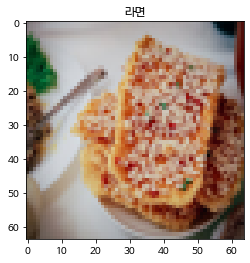

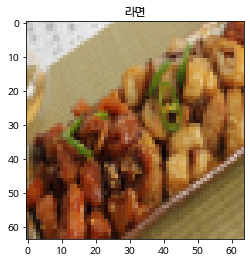

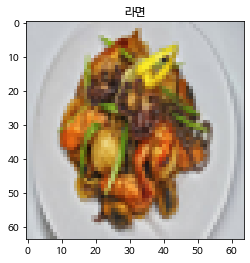

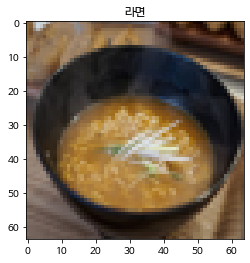

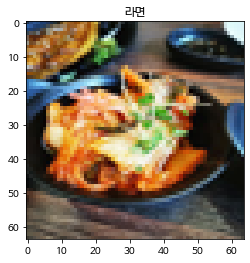

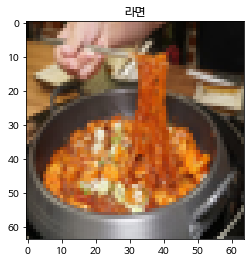

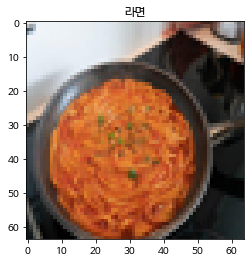

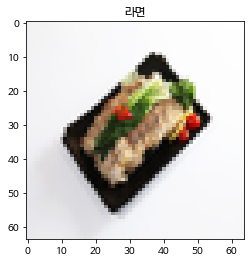

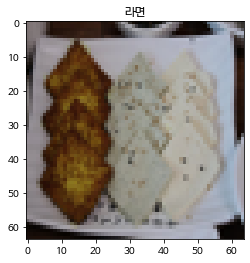

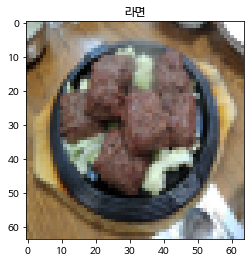

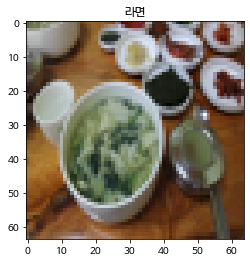

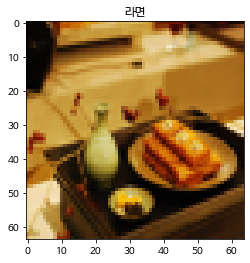

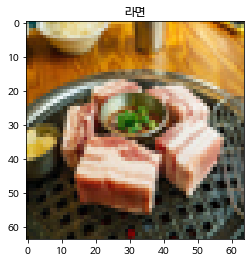

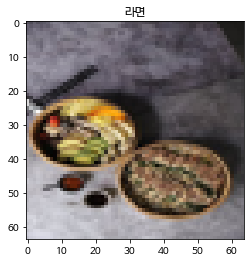

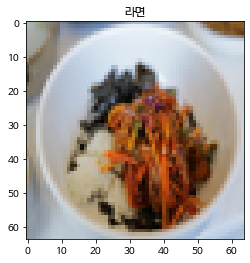

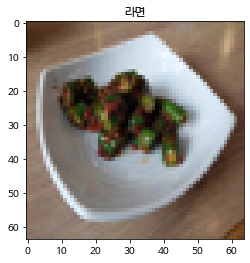

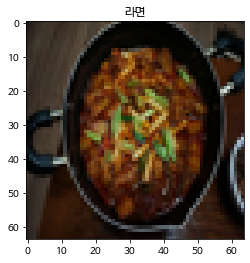

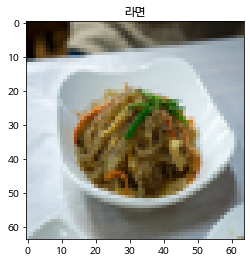

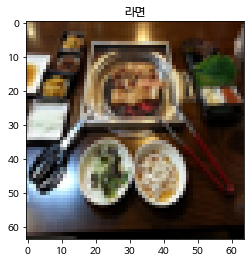

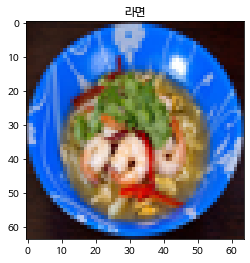

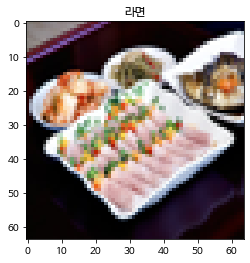

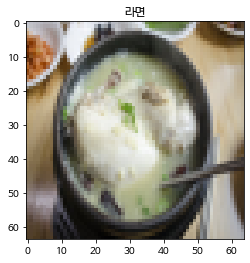

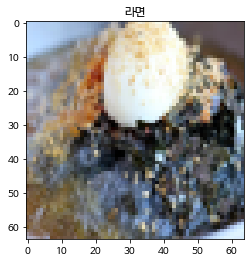

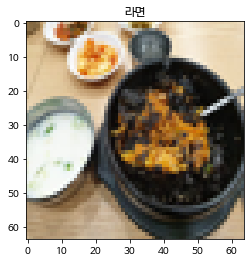

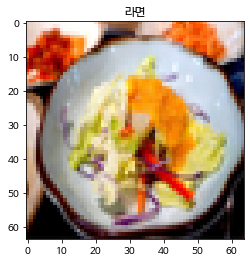

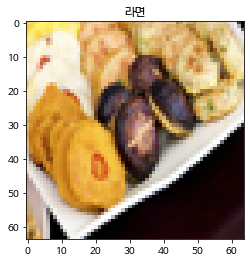

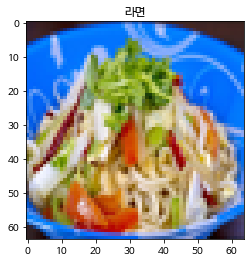

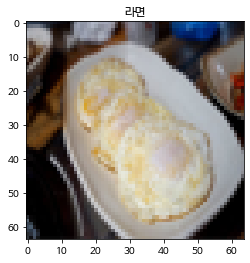

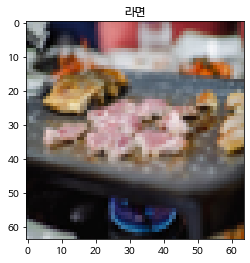

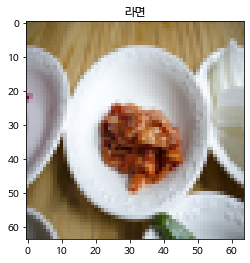

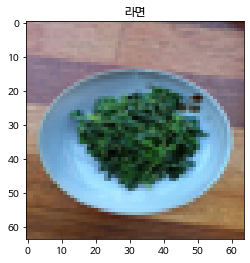

In [ ]:
for cnt in pic:
        fig, ax = plt.subplots()
        ax.imshow(Z[cnt])
        ax.set_title(name[0])

In [3]:
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/multi_image_data_5.npy',allow_pickle = True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(22920, 64, 64, 3)
(22920, 61)
(7641, 64, 64, 3)
(7641, 61)


In [4]:
categories = ['간장게장', '갈비구이', '갈비찜', '갈비탕',
              '갈치구이', '감자채볶음', '감자탕', '계란국',
              '계란찜', '고등어구이', '고등어조림', '고추장진미채볶음',
              '곰탕_설렁탕', '곱창구이', '곱창전골', '김밥', '김치볶음밥',
              '김치찌개', '김치찜', '깍두기', '닭갈비', '닭계장', '닭볶음탕',
              '동태찌개', '된장찌개', '두부김치', '떡갈비', '떡국_만두국',
              '떡볶이', '라면', '막국수', '만두', '매운탕', '물냉면', '미역국',
              '배추김치', '보쌈', '북엇국', '불고기', '비빔냉면', '비빔밥',
              '삼겹살', '삼계탕', '소세지볶음', '수육', '수제비', '알밥',
              '애호박볶음', '양념치킨', '유부초밥', '육개장', '육회', '잡곡밥',
              '잡채', '제육볶음', '족발', '주먹밥', '짜장면', '짬뽕', '피자',
              '후라이드치킨']  # os.listdir(dir) 

nb_classes = len(categories)

#표준화
X_train = X_train.astype(float) / 255 #.astype(float)
X_test = X_test.astype(float) / 255

In [9]:
from keras.applications import ResNet50
model = ResNet50(include_top=True, weights=None, input_shape=(64, 64, 3), pooling=max, classes=61)   # resnet50은 input데이터가 224로 넣어야 되는데 64라 정확성이 너무 떨어지는 것으로 예상

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [10]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100,validation_split=0.2)

Epoch 1/30
184/184 [==============================] - 40s 134ms/step - loss: 4.3289 - accuracy: 0.0229 - val_loss: 4.2412 - val_accuracy: 0.0144
Epoch 2/30
184/184 [==============================] - 22s 118ms/step - loss: 3.9295 - accuracy: 0.0536 - val_loss: 4.3863 - val_accuracy: 0.0290
Epoch 3/30
184/184 [==============================] - 22s 120ms/step - loss: 3.6533 - accuracy: 0.0837 - val_loss: 3.7711 - val_accuracy: 0.0689
Epoch 4/30
184/184 [==============================] - 22s 121ms/step - loss: 3.4262 - accuracy: 0.1241 - val_loss: 3.6950 - val_accuracy: 0.0818
Epoch 5/30
184/184 [==============================] - 22s 122ms/step - loss: 3.2134 - accuracy: 0.1631 - val_loss: 3.6317 - val_accuracy: 0.1073
Epoch 6/30
184/184 [==============================] - 22s 122ms/step - loss: 2.9840 - accuracy: 0.2126 - val_loss: 3.5792 - val_accuracy: 0.1222
Epoch 7/30
184/184 [==============================] - 23s 122ms/step - loss: 2.7405 - accuracy: 0.2623 - val_loss: 3.5327 - val_ac

In [11]:
model.evaluate(X_test, y_test, verbose=2)

239/239 - 5s - loss: 6.5021 - accuracy: 0.1360 - 5s/epoch - 21ms/step


[6.5020976066589355, 0.13597697019577026]

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((64,64,3)),
    tf.keras.applications.MobileNet(include_top=False, weights='imagenet'), # 연산 효율이 높고 고성능을 필요로 하지 않아 사용 
                                                                            
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(61, activation='softmax')  # 
])

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 61)                3965      
                                                                 
Total params: 3,495,037
Trainable params: 3,473,149
Non-trainable params: 21,888
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100,validation_split=0.2)

Epoch 1/30
184/184 [==============================] - 13s 51ms/step - loss: 4.1503 - accuracy: 0.0309 - val_loss: 3.9728 - val_accuracy: 0.0486
Epoch 2/30
184/184 [==============================] - 8s 43ms/step - loss: 3.5244 - accuracy: 0.1321 - val_loss: 3.4919 - val_accuracy: 0.1588
Epoch 3/30
184/184 [==============================] - 8s 43ms/step - loss: 2.6390 - accuracy: 0.3163 - val_loss: 3.0762 - val_accuracy: 0.2500
Epoch 4/30
184/184 [==============================] - 8s 44ms/step - loss: 1.8976 - accuracy: 0.4880 - val_loss: 2.9859 - val_accuracy: 0.2727
Epoch 5/30
184/184 [==============================] - 8s 43ms/step - loss: 1.3430 - accuracy: 0.6324 - val_loss: 2.9266 - val_accuracy: 0.3030
Epoch 6/30
184/184 [==============================] - 8s 44ms/step - loss: 0.9206 - accuracy: 0.7522 - val_loss: 2.9840 - val_accuracy: 0.3043
Epoch 7/30
184/184 [==============================] - 8s 43ms/step - loss: 0.5898 - accuracy: 0.8580 - val_loss: 2.9995 - val_accuracy: 0.315

In [14]:
model.evaluate(X_test, y_test, verbose=2)

239/239 - 2s - loss: 3.9859 - accuracy: 0.3403 - 2s/epoch - 8ms/step


[3.985928535461426, 0.3402695953845978]

In [15]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "/content/drive/MyDrive/korean food_700"
image_w = 64
image_h = 64


Z = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    Z.append(data)

Z = np.array(Z)
prediction = model.predict(Z)



cnt = 0

pic = []
name = []

#파일과 비교
for i in prediction:
    pre_ans = i.argmax()  

    for j , cate in enumerate(categories,0):
      if pre_ans == j: 
        pre_ans_str = cate

        print(filenames[cnt].split("/")[-1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
        cnt +=1
        if j==29 :
          pic.append(cnt)
          name.append(pre_ans_str)

12/12 [==============================] - 1s 28ms/step
해당 rice-3997767__340.jpg이미지는 배추김치로 추정됩니다.
해당 spicy-seafood-3852529__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 food-4452838__340.jpg이미지는 라면로 추정됩니다.
해당 korean-food-709606__340.jpg이미지는 라면로 추정됩니다.
해당 mandu-3852527__340.jpg이미지는 배추김치로 추정됩니다.
해당 korean-food-4781973__340.jpg이미지는 떡볶이로 추정됩니다.
해당 kimchi-3852526__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 pig-4901172__340.jpg이미지는 김치찜로 추정됩니다.
해당 octopus-desktop-4829030__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 food-4452839__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 chicken-soup-1346310__340.jpg이미지는 감자채볶음로 추정됩니다.
해당 file-version-4829032__340.jpg이미지는 유부초밥로 추정됩니다.
해당 delicious-5044522__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 korean-food-4781966__340.jpg이미지는 유부초밥로 추정됩니다.
해당 korean-food-4781965__340.jpg이미지는 김치찜로 추정됩니다.
해당 toppokki-1607479__340.jpg이미지는 고추장진미채볶음로 추정됩니다.
해당 market-1971125__340.jpg이미지는 배추김치로 추정됩니다.
해당 toppokki-2545943__340.jpg이미지는 육개장로 추정됩니다.
해당 kimbap-2610864__340.jpg이미지는 배추김치로 추정됩니다.
해당 tofu-597228__340.jpg이미지는 배추김치로 추정됩니다.
해당 kimch

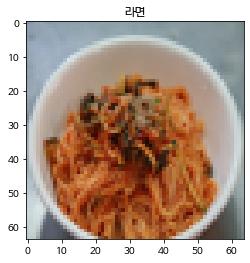

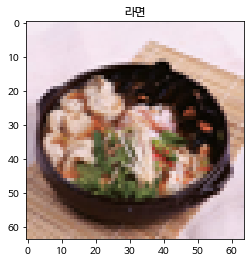

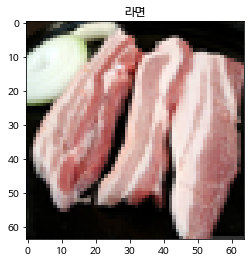

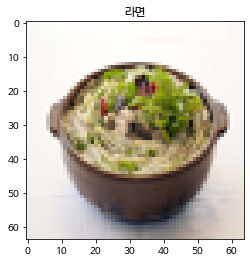

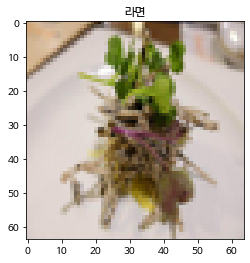

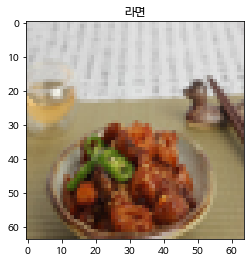

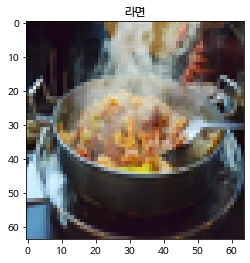

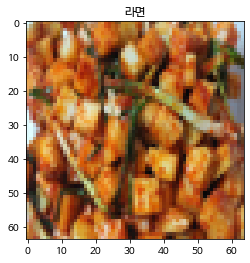

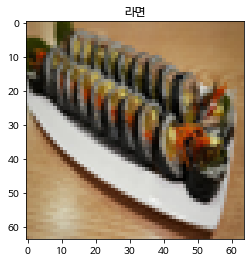

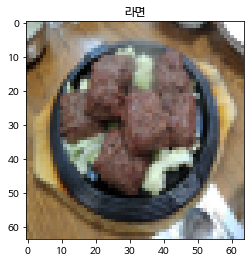

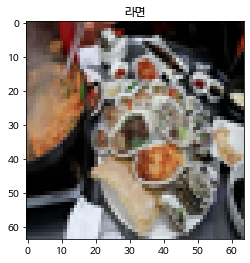

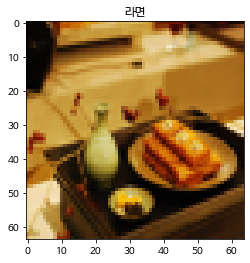

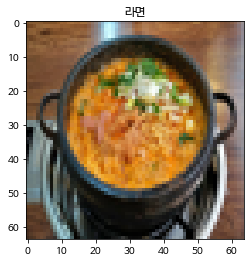

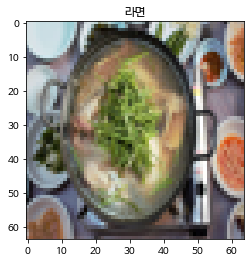

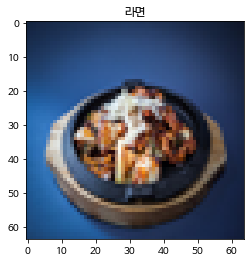

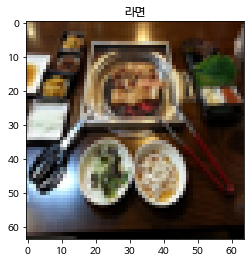

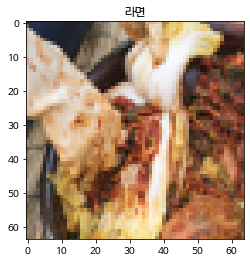

In [16]:
for cnt in pic:
        fig, ax = plt.subplots()
        ax.imshow(Z[cnt])
        ax.set_title(name[0])